In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

Data Clensing

In [3]:
# Load Dataset
import pandas as pd
df = pd.read_csv("spambase.data")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:

# Get The Columns As List
df.columns.tolist()

# Converting the Column Names To DataFrame
df.columns.to_frame()

# Checking to see if column names are duplicated
df.columns.duplicated()

# Replacing Empty spaces with underscore
df.columns.str.replace(' ','_')
len(df.columns.values)


58

In [5]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
df.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [8]:
df.duplicated().any()

True

In [9]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
24,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
101,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
102,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [10]:
df.drop_duplicates(keep='first', inplace=True)
duplicates

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
24,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
101,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
102,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [11]:
df.duplicated().any()

False

In [12]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not


In [13]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


K-Nearest Neighbor(KNN)

In [14]:
#checking dataset read in properly
df.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [15]:
#Describing Dataset(After clean)
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [16]:
#remove spam or not spam from data set 
X = df.drop(columns=['spam_or_not'])

#check that the target variable has been removed
X.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [17]:
#print spam or not spam colum
y = df['spam_or_not'].values

#view target values
y[0:]

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [19]:
# kNN Model 1
from sklearn.preprocessing import StandardScaler

#Centering and Feature Scaling
s = StandardScaler()
scaled_X_train = s.fit_transform(X_train)
scaled_X_test = s.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9144893111638955

In [20]:
#KNN model 2

from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3, metric='manhattan', p=2)

# Fit the classifier to the data
knn.fit(X_train,y_train)

#Show first 5 model predictions on the test data
y_pred = knn.predict(X_test)
y_pred[0:10]

print(y_test[0:10])
print(y_pred[0:10])

#check accuracy of model on the test data
knn.score(X_test, y_test)


[0 0 1 0 1 0 1 1 1 1]
[0 0 0 0 1 0 0 1 1 0]


0.831353919239905

In [21]:
#KNN model 3 

from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsClassifier()

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

#Show first 5 model predictions on the test data
y_pred = knn.predict(X_test)
y_pred[0:10]

print(y_test[0:10])
print(y_pred[0:10])

#check accuracy of model on the test data
knn.score(X_test, y_test)


[0.74821853 0.77315914 0.79453682 0.79809976 0.70783848]
cv_scores mean:0.7643705463182898
[0 0 1 0 1 0 1 1 1 1]
[0 0 0 0 1 0 0 1 1 0]


0.831353919239905

In [22]:
#KNN model 4

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1, metric='minkowski', p=2)

# Fit the classifier to the data
knn.fit(X_train,y_train)

#Show first 5 model predictions on the test data
y_pred = knn.predict(X_test)
y_pred[0:10]

print(y_test[0:10])
print(y_pred[0:10])

#check accuracy of model on the test data
knn.score(X_test, y_test)



[0 0 1 0 1 0 1 1 1 1]
[0 0 1 0 0 0 0 1 1 1]


0.7921615201900237

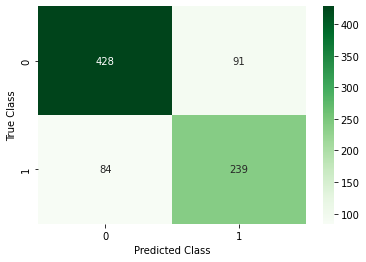

In [23]:
#import libraries for the KNN confusion matrix 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens', fmt = 'd')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [24]:
from sklearn.metrics import classification_report

#Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       519
           1       0.72      0.74      0.73       323

    accuracy                           0.79       842
   macro avg       0.78      0.78      0.78       842
weighted avg       0.79      0.79      0.79       842



Decsion tree

In [25]:
#feature scaling

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [26]:
#training the deciontree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=6)
classifier = classifier.fit(X_train,y_train)

#Decsiontree prediction
y_pred = classifier.predict(X_test) #cheak Accuracy
y_pred[0:10]

print(y_test[0:10])
print(y_pred[0:10])

classifier.score(X_test,y_test)

[0 0 1 0 1 0 1 1 1 1]
[0 0 0 0 0 0 1 1 1 1]


0.9085510688836105

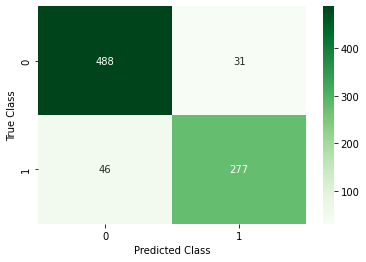

In [27]:
#Import libraries for the decsion tree confusion matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Createing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens', fmt = 'd')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [28]:
from sklearn.metrics import classification_report

#Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       519
           1       0.90      0.86      0.88       323

    accuracy                           0.91       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.91      0.91      0.91       842

